In [11]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('data/2021-04-10 13-01-24_v2.csv') 
# df = pd.read_csv('data/2021-04-10 15-29-34.csv') 
#df = pd.read_csv('data/2021-04-10 18-14-14.csv') 


In [13]:
df

,time,# warm-ups since codes cleared (),Absolute load value (%),Absolute pedal position D (%),Absolute pedal position E (%),Absolute throttle position B (%),Average fuel consumption (L/100km),Average fuel consumption (total) (L/100km),Average speed (km/h),Calculated boost (bar),...,Oxygen sensor 1 Wide Range Equivalence ratio (),Oxygen sensor 2 Bank 1 Short term fuel trim (%),Oxygen sensor 2 Bank 1 Voltage (V),Relative throttle position (%),Short term fuel % trim - Bank 1 (%),Throttle position (%),Timing advance (°),Vehicle acceleration (m_sec2),Vehicle speed (km/h),Unnamed: 46
0,13:01:49.413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13:01:49.509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,13:01:49.603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13:01:49.694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13:01:49.774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,13:17:10.203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4892,13:17:10.284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4893,13:17:10.361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4894,13:17:10.431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.time = pd.to_datetime(df.time)

In [45]:
df

,time,# warm-ups since codes cleared (),Absolute load value (%),Absolute pedal position D (%),Absolute pedal position E (%),Absolute throttle position B (%),Average fuel consumption (L/100km),Average fuel consumption (total) (L/100km),Average speed (km/h),Calculated boost (bar),...,Oxygen sensor 1 Wide Range Equivalence ratio (),Oxygen sensor 2 Bank 1 Short term fuel trim (%),Oxygen sensor 2 Bank 1 Voltage (V),Relative throttle position (%),Short term fuel % trim - Bank 1 (%),Throttle position (%),Timing advance (°),Vehicle acceleration (m_sec2),Vehicle speed (km/h),Unnamed: 46
0,2021-04-10 13:01:49.413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-10 13:01:49.509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,2021-04-10 13:01:49.603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-10 13:01:49.694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-10 13:01:49.774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,2021-04-10 13:17:10.203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4892,2021-04-10 13:17:10.284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4893,2021-04-10 13:17:10.361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4894,2021-04-10 13:17:10.431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for i in df.columns:
    print(i, end='; ')

time; # warm-ups since codes cleared (); Absolute load value (%); Absolute pedal position D (%); Absolute pedal position E (%); Absolute throttle position B (%); Average fuel consumption (L/100km); Average fuel consumption (total) (L/100km); Average speed (km/h); Calculated boost (bar); Calculated engine load value (%); Calculated instant fuel consumption (L/100km); Calculated instant fuel rate (L/h); Catalyst temperature Bank 1 Sensor 1 (℃); Commanded EGR duty (%); Commanded evaporative purge (%); Commanded throttle actuator (%); Control module voltage (V); Distance traveled since codes cleared (km); Distance traveled with MIL on (km); Distance travelled (km); Distance travelled (total) (km); Engine coolant temperature (℃); Engine RPM (rpm); Fuel economizer (based on fuel system status and throttle position) (); Fuel used (L); Fuel used (total) (L); Fuel used price ($); Fuel used price (total) ($); Fuel/Air commanded equivalence ratio (); Instant engine power (based on fuel consumptio

In [16]:

fig = px.line(df, x='time', y='Engine RPM (rpm)', title='',color_discrete_sequence=['red'], template='simple_white')
fig.show()

<AxesSubplot:label='96afa9a2-786e-48b0-8c5a-121c026d1153', xlabel='time', ylabel='Instant engine power (based on fuel consumption) (hp)'>

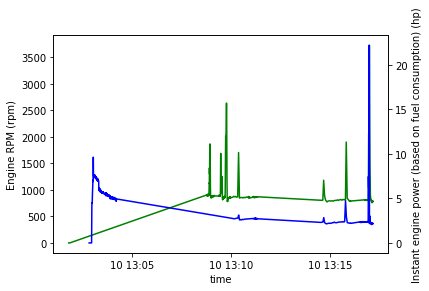

In [17]:

sns.lineplot(data=df, x='time', y='Engine RPM (rpm)',color="g")
ax2 = plt.twinx()
#sns.lineplot(data=df, x='time', y='Calculated instant fuel rate (L/h)', color="b", ax=ax2)
y2 = 'Instant engine power (based on fuel consumption) (hp)'
sns.lineplot(data=df, x='time', y=y2, color="b", ax=ax2)


In [18]:
maf = 'MAF air flow rate (g/sec)'
o1 = 'Oxygen sensor 2 Bank 1 Short term fuel trim (%)'
o2 = 'Oxygen sensor 2 Bank 1 Voltage (V)'

<AxesSubplot:label='02a8e596-94d4-4573-a1b1-0b5dd1d2d47c', xlabel='time', ylabel='Oxygen sensor 2 Bank 1 Voltage (V)'>

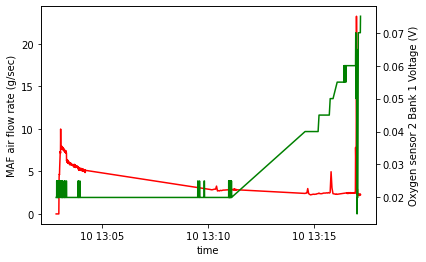

In [19]:
sns.lineplot(data=df, x='time', y=maf,color="r", legend='brief')
# ax2 = plt.twinx()
# sns.lineplot(data=df, x='time', y=o1, color="b", ax=ax2)
ax3 = plt.twinx()
sns.lineplot(data=df, x='time', y=o2, color="g", ax=ax3)


In [23]:
vars = list(df.columns)

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [26]:
vars.remove('time')

In [41]:
def time_plot(df, var):
    sns.lineplot(data=df, x='time', y=var,color='r', legend='brief', label=var)
    var_str = ''.join(e for e in var if e.isalnum())
    print(var_str)
    plt.savefig('Plots/'+var_str+'.png', transparent=True)
    plt.close()


In [42]:
time_plot(df, maf)

MAFairflowrategsec


In [43]:
for i in vars:
    time_plot(df, i)

warmupssincecodescleared
Absoluteloadvalue
AbsolutepedalpositionD
AbsolutepedalpositionE
AbsolutethrottlepositionB
AveragefuelconsumptionL100km
AveragefuelconsumptiontotalL100km
Averagespeedkmh
Calculatedboostbar
Calculatedengineloadvalue
CalculatedinstantfuelconsumptionL100km
CalculatedinstantfuelrateLh
CatalysttemperatureBank1Sensor1
CommandedEGRduty
Commandedevaporativepurge
Commandedthrottleactuator
ControlmodulevoltageV
Distancetraveledsincecodesclearedkm
DistancetraveledwithMILonkm
Distancetravelledkm
Distancetravelledtotalkm
Enginecoolanttemperature
EngineRPMrpm
Fueleconomizerbasedonfuelsystemstatusandthrottleposition
FuelusedL
FuelusedtotalL
Fuelusedprice
Fuelusedpricetotal
FuelAircommandedequivalenceratio
Instantenginepowerbasedonfuelconsumptionhp
Intakeairtemperature
IntakemanifoldabsolutepressurekPa
LongtermfueltrimBank1
MAFairflowrategsec
OBDModuleVoltageV
Oxygensensor1WideRangeCurrentmAmA
Oxygensensor1WideRangeEquivalenceratio
Oxygensensor2Bank1Shorttermfueltrim
Oxygensens